In [ ]:
# Connect to drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, SubsetRandomSampler
import random
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping

from fastprogress import master_bar, progress_bar
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
print(df.shape)

(284807, 31)


In [ ]:
# Check the distribution of the target variable
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Check if there is null values
df.isnull().sum().max()

0

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# The classes are heavily imbalanced
print('Non Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Non Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
# Preprocessing the data
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time']= StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

In [ ]:
# Split the data into training and testing sets with a proportion of 80-20%
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays, if not already done
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
X_train.shape

(227845, 30)

In [ ]:
X_test.shape

(56962, 30)

In [ ]:
# Check the ratios after split
print("Train Ratio:", round(len(X_train) / len(df), 2) * 100, "%")
# print("Validation Ratio:", round(len(X_test) / len(df), 2) * 100, "%")
print("Test Ratio:", round(len(X_test) / len(df), 2) * 100, "%")

Train Ratio: 80.0 %
Test Ratio: 20.0 %


In [ ]:
# Apply Borderline SMOTE to balance our data to ensure that the model has enough exposure to both classes

borderlineSMOTE = BorderlineSMOTE (k_neighbors=10, random_state= 42 )

X_train_with_smote, y_train_with_smote = borderlineSMOTE.fit_resample(X_train,y_train)

print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_with_smote))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


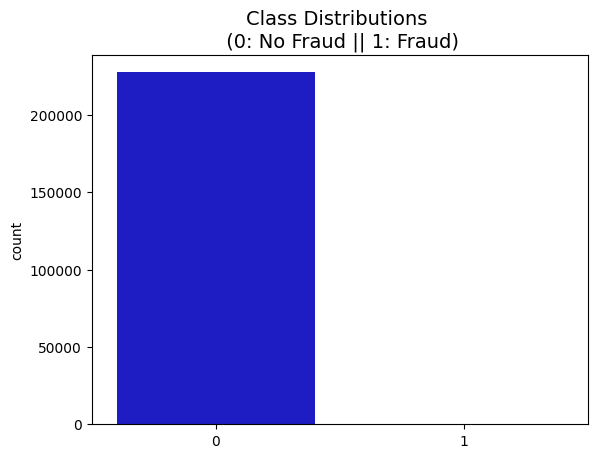

In [ ]:
# Unbalanced training data class distribution - Before BorderlineSMOTE

colors = ["#0101DF", "#DF0101"]

sns.countplot(x=y_train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


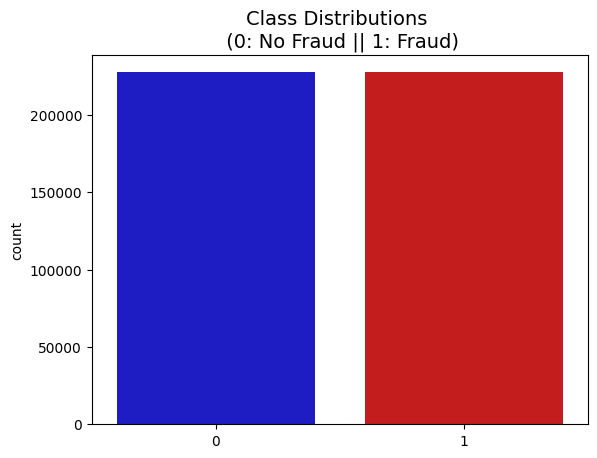

In [ ]:
# Balanced training data class distribution - After BorderlineSMOTE
colors = ["#0101DF", "#DF0101"]

sns.countplot(x=y_train_with_smote, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


In [ ]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.regularizers import l1
from keras.models import Model
from keras.utils import to_categorical

In [ ]:
# Building Autoencoder Model

# Input layer
input_dim = X_train_with_smote.shape[1]

# Encoder
encoding_dim = int(input_dim / 2) - 1
input_layer = Input(shape=(input_dim, ), name='Input')

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5), name='encoder1')(input_layer)
encoder = BatchNormalization(name='bn_encoder1')(encoder)
encoder = Dense(int(encoding_dim / 2), activation="relu", name='encoder2')(encoder)
encoder = Dropout(0.2, name='dropout_encoder1')(encoder)  # Dropout layer for regularization
encoder = Dense(int(encoding_dim / 4), activation="tanh", name='encoder3')(encoder)  # Additional encoder layer

# Decoder
decoder = Dense(int(encoding_dim / 4), activation='tanh', name='decoder1')(encoder)
decoder = Dropout(0.2, name='dropout_decoder1')(decoder)  # Dropout layer for regularization
decoder = Dense(int(encoding_dim / 2), activation='relu', name='decoder2')(decoder)
decoder = BatchNormalization(name='bn_decoder1')(decoder)
decoder = Dense(input_dim, activation='sigmoid', name='decoder3')(decoder)  # Using sigmoid for the final layer

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoder)


In [ ]:
# Model overview
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30)]              0         
                                                                 
 encoder1 (Dense)            (None, 14)                434       
                                                                 
 bn_encoder1 (BatchNormaliz  (None, 14)                56        
 ation)                                                          
                                                                 
 encoder2 (Dense)            (None, 7)                 105       
                                                                 
 dropout_encoder1 (Dropout)  (None, 7)                 0         
                                                                 
 encoder3 (Dense)            (None, 3)                 24        
                                                             

In [ ]:
# Training parameters
nb_epoch = 50
batch_size = 512

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define callbacks
checkpointer = ModelCheckpoint(filepath="model.h5", verbose=0, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
history = autoencoder.fit(X_train_with_smote, X_train_with_smote,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history

# Safely load the trained model
try:
    autoencoder = load_model('model.h5')
except Exception as e:
    print(f"Error loading the model: {e}")

Epoch 1/50
889/889 [==============================] - 9s 7ms/step - loss: 8.8327 - accuracy: 0.1738 - val_loss: 1.0803 - val_accuracy: 0.1191
Epoch 2/50
889/889 [==============================] - 5s 6ms/step - loss: 8.5335 - accuracy: 0.2084 - val_loss: 1.0589 - val_accuracy: 0.0875
Epoch 3/50
889/889 [==============================] - 5s 5ms/step - loss: 8.5046 - accuracy: 0.1932 - val_loss: 1.0707 - val_accuracy: 0.0942
Epoch 4/50
889/889 [==============================] - 5s 5ms/step - loss: 8.4895 - accuracy: 0.1756 - val_loss: 1.0592 - val_accuracy: 0.0986
Epoch 5/50
889/889 [==============================] - 9s 10ms/step - loss: 8.4802 - accuracy: 0.2482 - val_loss: 1.0462 - val_accuracy: 0.2487
Epoch 6/50
889/889 [==============================] - 6s 7ms/step - loss: 8.4738 - accuracy: 0.2995 - val_loss: 1.0576 - val_accuracy: 0.2414
Epoch 7/50
889/889 [==============================] - 11s 12ms/step - loss: 8.4701 - accuracy: 0.3044 - val_loss: 1.0762 - val_accuracy: 0.2342
Epo

In [ ]:
import keras
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
import tensorflow as tf
import keras
from keras import layers

In [ ]:
# Encoder Model for generating encoded features
encoder_model = Model(inputs=input_layer, outputs=encoder)

In [ ]:
# Generate encoded features of the autoencoder to transform the training data, which will then be used to train a Multilayer Perceptron (MLP).
X_train_encoded = encoder_model.predict(X_train_with_smote)
X_test_encoded = encoder_model.predict(X_test)


1781/1781 [==============================] - 3s 2ms/step


In [ ]:
# Building the MLP model
mlp_classifier = Sequential([
    Dense(256, input_dim=X_train_encoded.shape[1], activation='relu', name='dense1'),
    Dropout(0.5, name='dropout1'),  # Adding dropout to prevent overfitting
    Dense(128, activation='relu', name='dense2'),
    Dropout(0.5, name='dropout2'),
    Dense(64, activation='relu', name='dense3'),
    Dropout(0.3, name='dropout3'),
    Dense(1, activation='sigmoid', name='output')  # Output layer for binary classification
])

# Compile the model
mlp_classifier.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for the MLP as well
mlp_checkpointer = ModelCheckpoint(filepath="mlp_model.h5", verbose=0, save_best_only=True)
mlp_early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the MLP model
mlp_history = mlp_classifier.fit(X_train_encoded, y_train_with_smote,
                                 epochs=50,
                                 batch_size=512,
                                 shuffle=True,
                                validation_data=(X_test_encoded, y_test),
                                 verbose=1,
                                 callbacks=[mlp_checkpointer, mlp_early_stopping]).history

# Load the best model
try:
    mlp_classifier = load_model('mlp_model.h5')
except Exception as e:
    print(f"Error loading the MLP model: {e}")




Epoch 1/50
889/889 [==============================] - 10s 10ms/step - loss: 0.2075 - accuracy: 0.9188 - val_loss: 0.1879 - val_accuracy: 0.9137
Epoch 2/50
889/889 [==============================] - 11s 12ms/step - loss: 0.1700 - accuracy: 0.9379 - val_loss: 0.1843 - val_accuracy: 0.9149
Epoch 3/50
889/889 [==============================] - 10s 12ms/step - loss: 0.1648 - accuracy: 0.9397 - val_loss: 0.1671 - val_accuracy: 0.9185
Epoch 4/50
889/889 [==============================] - 9s 10ms/step - loss: 0.1618 - accuracy: 0.9406 - val_loss: 0.1657 - val_accuracy: 0.9206
Epoch 5/50
889/889 [==============================] - 11s 12ms/step - loss: 0.1597 - accuracy: 0.9409 - val_loss: 0.1682 - val_accuracy: 0.9185
Epoch 6/50
889/889 [==============================] - 10s 11ms/step - loss: 0.1586 - accuracy: 0.9414 - val_loss: 0.1691 - val_accuracy: 0.9179
Epoch 7/50
889/889 [==============================] - 10s 11ms/step - loss: 0.1576 - accuracy: 0.9414 - val_loss: 0.1831 - val_accuracy: 

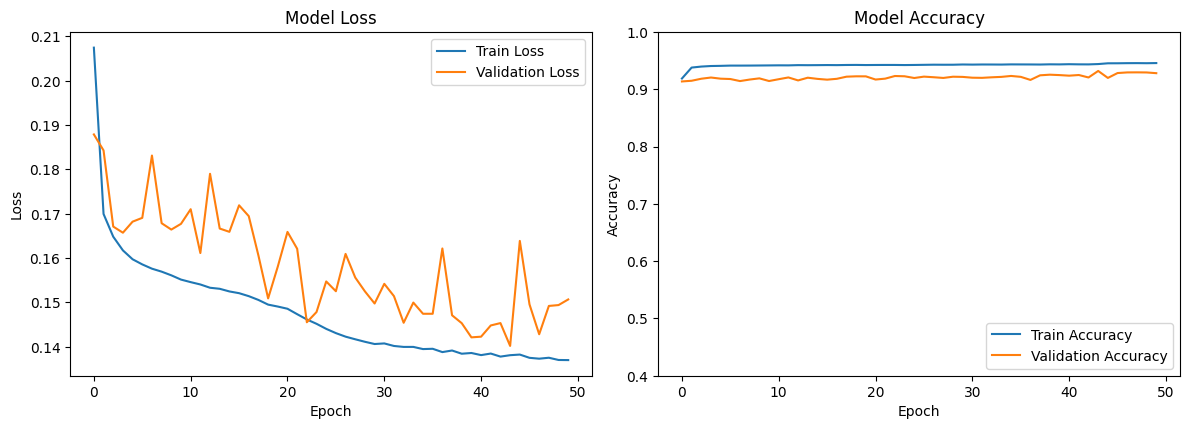

In [ ]:
history = mlp_history

# Plot training & validation loss values
plt.figure(figsize=(12, 12))
plt.subplot(321)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(322)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.4, 1.0)  # Adjusted upper limit to 1.0 as accuracy should not exceed 1
plt.legend(loc='lower right')

plt.tight_layout()  # This can help prevent overlap of elements
plt.show()

In [ ]:
# Define a function to segment the data based on transaction amount
def segment_data_by_amount(X, y):
    # Use the actual 'Amount' column values for segmentation
    amount_column_index = df.columns.get_loc('Amount')
    low_amount_indices = X[:, amount_column_index] < 0  # Standardized amount < 0 (low)
    high_amount_indices = X[:, amount_column_index] >= 0  # Standardized amount >= 0 (high)

    X_low = X[low_amount_indices]
    y_low = y[low_amount_indices]
    X_high = X[high_amount_indices]
    y_high = y[high_amount_indices]

    return X_low, y_low, X_high, y_high

# Segment the test data
X_low_test, y_low_test, X_high_test, y_high_test = segment_data_by_amount(X_test, y_test)

# Encode features for each test segment
encoded_low_test = encoder_model.predict(X_low_test)
encoded_high_test = encoder_model.predict(X_high_test)

404/404 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(mlp, X_test_encoded, y_test):
    # Predict probabilities and labels
    y_pred_proba = mlp.predict(X_test_encoded)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f'ROC-AUC Score: {roc_auc:.4f}')

    # Classification Report
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


Evaluation on Low Amount Transactions:
1377/1377 [==============================] - 2s 2ms/step
Accuracy: 0.9306
Precision: 0.0174
Recall: 0.8852
F1 Score: 0.0341
ROC-AUC Score: 0.9525

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     43999
           1       0.02      0.89      0.03        61

    accuracy                           0.93     44060
   macro avg       0.51      0.91      0.50     44060
weighted avg       1.00      0.93      0.96     44060



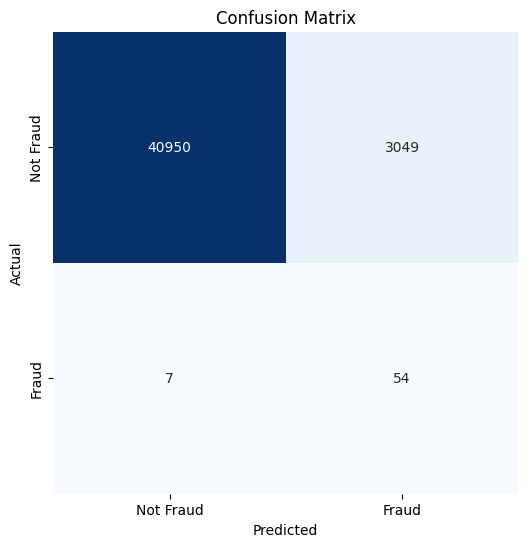

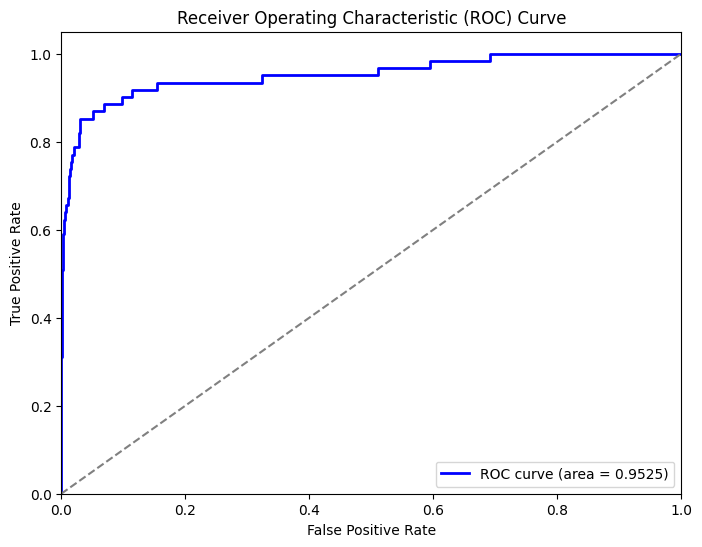

Evaluation on High Amount Transactions:
404/404 [==============================] - 1s 2ms/step
Accuracy: 0.9368
Precision: 0.0412
Recall: 0.9459
F1 Score: 0.0790
ROC-AUC Score: 0.9682

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     12865
           1       0.04      0.95      0.08        37

    accuracy                           0.94     12902
   macro avg       0.52      0.94      0.52     12902
weighted avg       1.00      0.94      0.96     12902



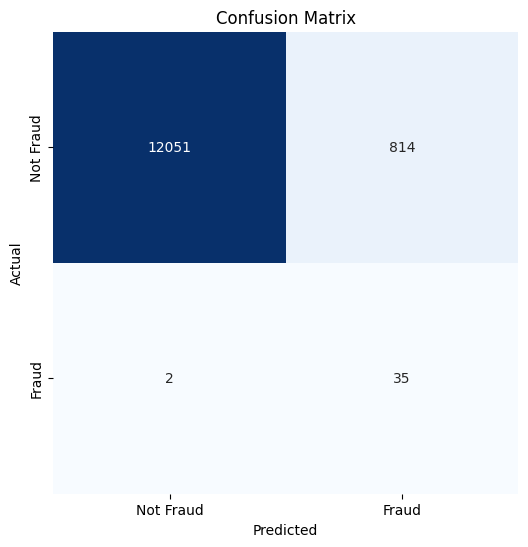

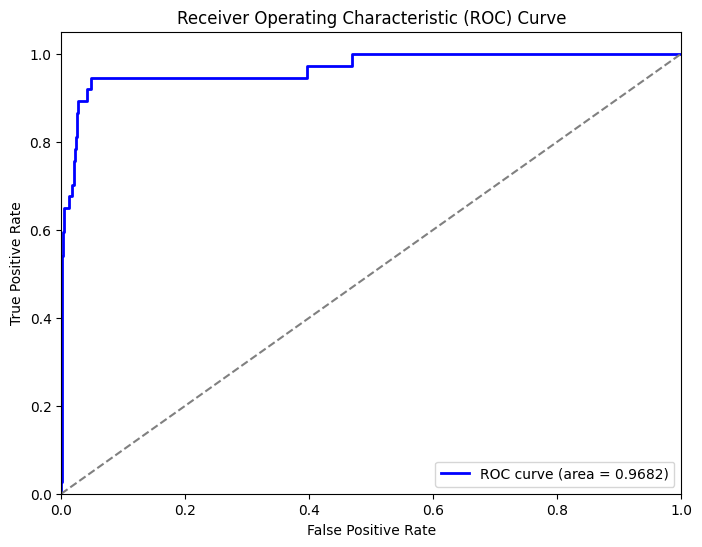

In [ ]:
# Evaluate on Each Test Segment

print("Evaluation on Low Amount Transactions:")
evaluate_model(mlp_classifier, encoded_low_test, y_low_test)

print("Evaluation on High Amount Transactions:")
evaluate_model(mlp_classifier, encoded_high_test, y_high_test)

404/404 [==============================] - 1s 1ms/step


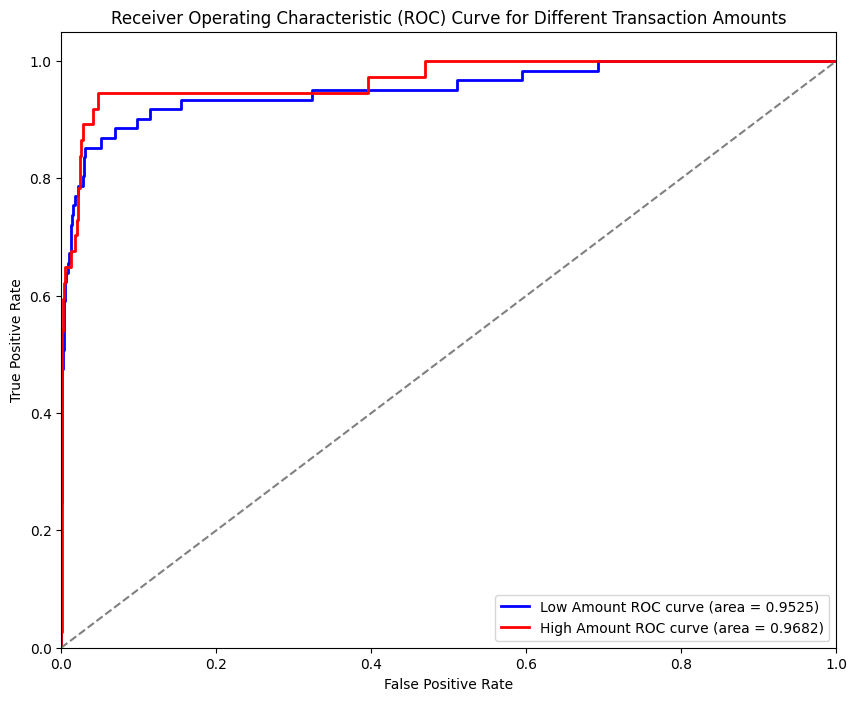

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curves(mlp, X_low_test, y_low_test, X_high_test, y_high_test):
    # Predict probabilities for low and high amount transactions
    y_low_pred_proba = mlp.predict(X_low_test)
    y_high_pred_proba = mlp.predict(X_high_test)

    # Compute ROC curve and ROC area for low amount transactions
    fpr_low, tpr_low, _ = roc_curve(y_low_test, y_low_pred_proba)
    roc_auc_low = roc_auc_score(y_low_test, y_low_pred_proba)

    # Compute ROC curve and ROC area for high amount transactions
    fpr_high, tpr_high, _ = roc_curve(y_high_test, y_high_pred_proba)
    roc_auc_high = roc_auc_score(y_high_test, y_high_pred_proba)

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    plt.plot(fpr_low, tpr_low, color='blue', lw=2, label='Low Amount ROC curve (area = %0.4f)' % roc_auc_low)
    plt.plot(fpr_high, tpr_high, color='red', lw=2, label='High Amount ROC curve (area = %0.4f)' % roc_auc_high)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Different Transaction Amounts')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for low and high amount transactions
plot_roc_curves(mlp_classifier, encoded_low_test, y_low_test, encoded_high_test, y_high_test)


In [ ]:
# Ensure 'Time' is a column in the dataframe and sort by 'Time'
df_sorted = df.sort_values(by='Time').reset_index(drop=True)

# Calculate time differences between consecutive transactions
df_sorted['Time_Diff'] = df_sorted['Time'].diff().fillna(0)

# Exclude zero time differences for quantile calculation
non_zero_time_diff = df_sorted['Time_Diff'][df_sorted['Time_Diff'] > 0]

# Define thresholds for short and long time differences using adjusted percentiles
short_time_threshold = non_zero_time_diff.quantile(0.1)
long_time_threshold = non_zero_time_diff.quantile(0.9)

# Print the thresholds to check
print(f'Short time difference threshold (10th percentile): {short_time_threshold}')
print(f'Long time difference threshold (90th percentile): {long_time_threshold}')


Short time difference threshold (10th percentile): 2.1057923729639327e-05
Long time difference threshold (90th percentile): 4.211584745955621e-05


In [ ]:
# Segment data based on time differences
short_time_indices = df_sorted['Time_Diff'] <= short_time_threshold
long_time_indices = df_sorted['Time_Diff'] >= long_time_threshold

# Create segmented datasets
df_short_time = df_sorted[short_time_indices]
df_long_time = df_sorted[long_time_indices]

# Check the sizes of the segmented datasets
print(f'Size of short time segment: {df_short_time.shape[0]}')
print(f'Size of long time segment: {df_long_time.shape[0]}')

# Ensure the segments are not empty
if df_short_time.shape[0] == 0 or df_long_time.shape[0] == 0:
    raise ValueError("One of the segments is empty. Adjust the thresholds.")


Size of short time segment: 177582
Size of long time segment: 13692


In [ ]:
# Extract features and labels for each segment
X_short_time = df_short_time.drop(['Class', 'Time_Diff'], axis=1).values
y_short_time = df_short_time['Class'].values

X_long_time = df_long_time.drop(['Class', 'Time_Diff'], axis=1).values
y_long_time = df_long_time['Class'].values


In [ ]:
# Encode features using the trained encoder model
encoded_short_time = encoder_model.predict(X_short_time)
encoded_long_time = encoder_model.predict(X_long_time)


428/428 [==============================] - 1s 2ms/step


Evaluation on Short Time Difference Transactions:
5550/5550 [==============================] - 10s 2ms/step
Accuracy: 0.9362
Precision: 0.0203
Recall: 0.8387
F1 Score: 0.0396
ROC-AUC Score: 0.9512

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    177303
           1       0.02      0.84      0.04       279

    accuracy                           0.94    177582
   macro avg       0.51      0.89      0.50    177582
weighted avg       1.00      0.94      0.97    177582



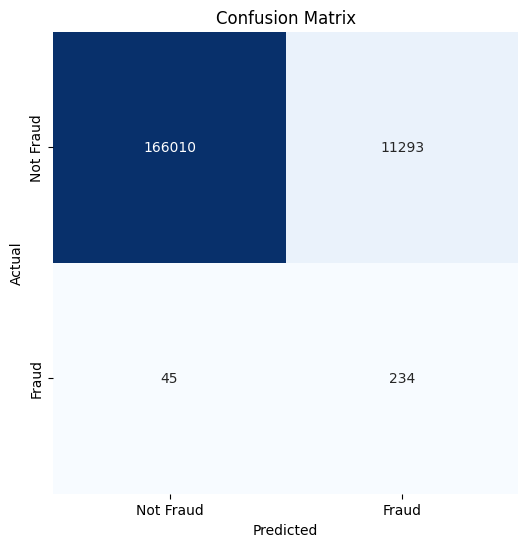

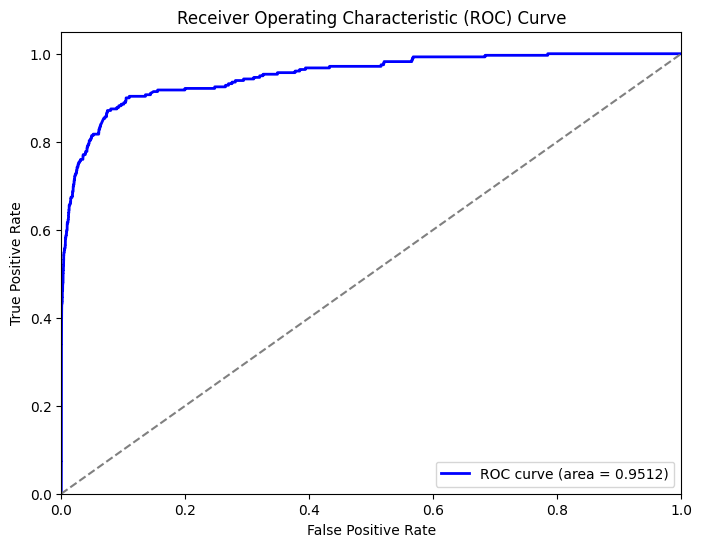

Evaluation on Long Time Difference Transactions:
428/428 [==============================] - 1s 2ms/step
Accuracy: 0.8848
Precision: 0.0327
Recall: 0.8281
F1 Score: 0.0629
ROC-AUC Score: 0.9482

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     13628
           1       0.03      0.83      0.06        64

    accuracy                           0.88     13692
   macro avg       0.52      0.86      0.50     13692
weighted avg       0.99      0.88      0.93     13692



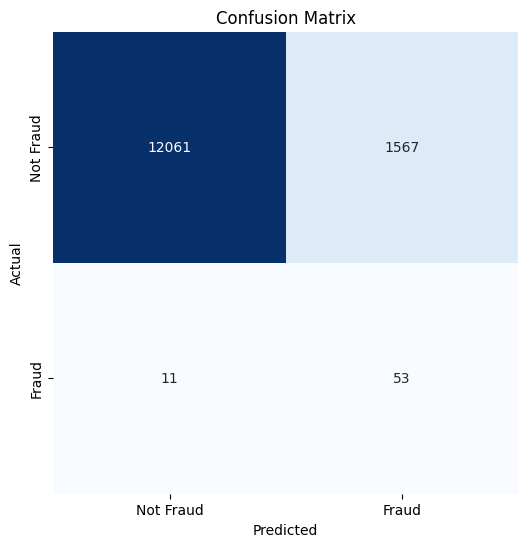

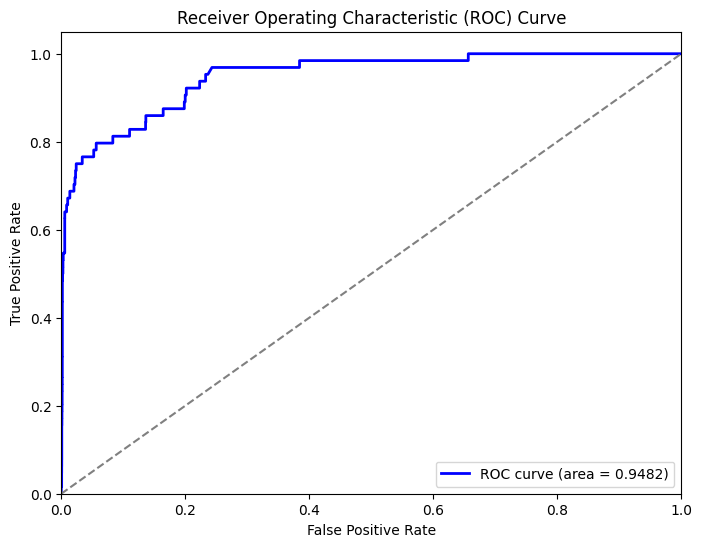

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(mlp, X_test_encoded, y_test):
    # Predict probabilities and labels
    y_pred_proba = mlp.predict(X_test_encoded)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f'ROC-AUC Score: {roc_auc:.4f}')

    # Classification Report
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate on each time segment
print("Evaluation on Short Time Difference Transactions:")
evaluate_model(mlp_classifier, encoded_short_time, y_short_time)

print("Evaluation on Long Time Difference Transactions:")
evaluate_model(mlp_classifier, encoded_long_time, y_long_time)


428/428 [==============================] - 1s 2ms/step


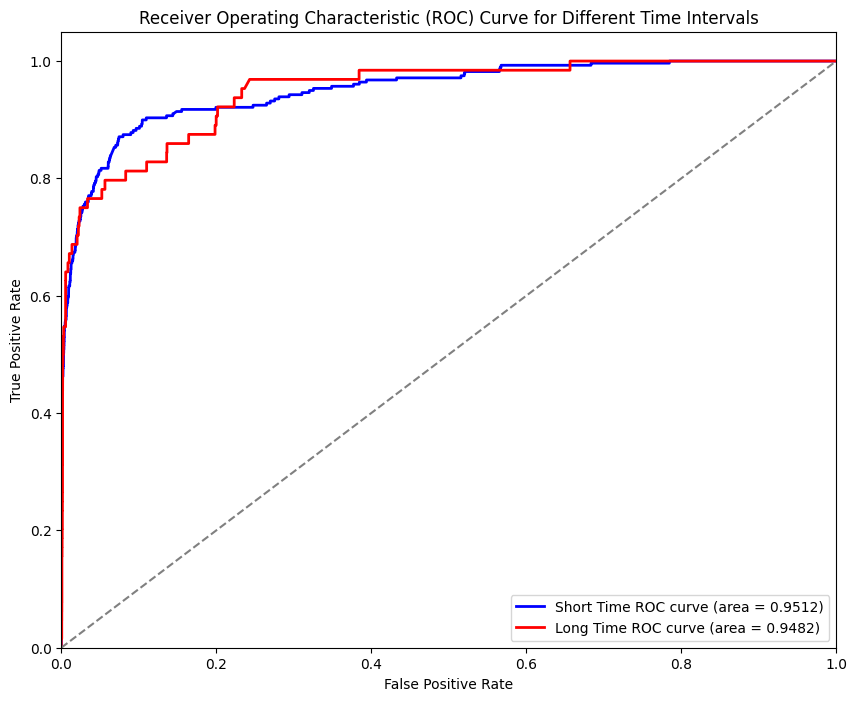

In [ ]:
def plot_roc_curves(mlp, X_short_time, y_short_time, X_long_time, y_long_time):
    # Predict probabilities for short and long time difference transactions
    y_short_pred_proba = mlp.predict(X_short_time)
    y_long_pred_proba = mlp.predict(X_long_time)

    # Compute ROC curve and ROC area for short time difference transactions
    fpr_short, tpr_short, _ = roc_curve(y_short_time, y_short_pred_proba)
    roc_auc_short = roc_auc_score(y_short_time, y_short_pred_proba)

    # Compute ROC curve and ROC area for long time difference transactions
    fpr_long, tpr_long, _ = roc_curve(y_long_time, y_long_pred_proba)
    roc_auc_long = roc_auc_score(y_long_time, y_long_pred_proba)

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    plt.plot(fpr_short, tpr_short, color='blue', lw=2, label='Short Time ROC curve (area = %0.4f)' % roc_auc_short)
    plt.plot(fpr_long, tpr_long, color='red', lw=2, label='Long Time ROC curve (area = %0.4f)' % roc_auc_long)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Different Time Intervals')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for short and long time difference transactions
plot_roc_curves(mlp_classifier, encoded_short_time, y_short_time, encoded_long_time, y_long_time)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense, Lambda, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanSquaredError


In [ ]:
# Building VAEs Model

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Network parameters
input_shape = (X_train_with_smote.shape[1], )
intermediate_dim = 512
latent_dim = 2
batch_size = 512
epochs = 50

# Encoder
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
x = BatchNormalization()(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
x = BatchNormalization()(x)
outputs = Dense(input_shape[0], activation='sigmoid')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

# VAE Model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

# Loss function
reconstruction_loss = mse(inputs, outputs) * input_shape[0]
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1) * -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam', metrics=['accuracy'])
vae.summary()

# Model summary
vae.summary()

Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 30)]                 0         []                            
                                                                                                  
 encoder (Functional)        [(None, 2),                  19972     ['encoder_input[0][0]']       
                              (None, 2),                                                          
                              (None, 2)]                                                          
                                                                                                  
 decoder (Functional)        (None, 30)                   18974     ['encoder[0][2]']             
                                                                                            

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, mode='min', verbose=1)

# Train the model
history = vae.fit(X_train_with_smote, X_train_with_smote,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=(X_test, X_test),
                  callbacks=[early_stopping, reduce_lr])

# Save the trained model
vae.save('model.h5', save_format='tf')

# Safely load the trained model
try:
    autoencoder = load_model('model.h5')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")


Epoch 1/50
889/889 [==============================] - 25s 24ms/step - loss: 256.3441 - accuracy: 0.2758 - val_loss: 31.9222 - val_accuracy: 0.3520 - lr: 0.0010
Epoch 2/50
889/889 [==============================] - 23s 25ms/step - loss: 254.4906 - accuracy: 0.2931 - val_loss: 31.6983 - val_accuracy: 0.3728 - lr: 0.0010
Epoch 3/50
889/889 [==============================] - 23s 25ms/step - loss: 254.3394 - accuracy: 0.2880 - val_loss: 31.6042 - val_accuracy: 0.3762 - lr: 0.0010
Epoch 4/50
889/889 [==============================] - 24s 27ms/step - loss: 254.2195 - accuracy: 0.2815 - val_loss: 31.5588 - val_accuracy: 0.3745 - lr: 0.0010
Epoch 5/50
889/889 [==============================] - 24s 27ms/step - loss: 254.1725 - accuracy: 0.2764 - val_loss: 31.4586 - val_accuracy: 0.3828 - lr: 0.0010
Epoch 6/50
889/889 [==============================] - 21s 24ms/step - loss: 254.0927 - accuracy: 0.2767 - val_loss: 31.4464 - val_accuracy: 0.3808 - lr: 0.0010
Epoch 7/50
889/889 [====================

Model loaded successfully.


In [ ]:
# Encoder Model for generating encoded features
encoder_model = Model(inputs, z_mean)

# Generate encoded features of the VAE to transform the training data
X_train_encoded = encoder_model.predict(X_train_with_smote)
X_test_encoded = encoder_model.predict(X_test)


1781/1781 [==============================] - 8s 5ms/step


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Get encoded data for MLP
X_train_encoded = encoder.predict(X_train_with_smote)[0]
X_test_encoded = encoder.predict(X_test)[0]

# Building the MLP model
mlp_classifier = Sequential([
    Dense(256, input_dim=latent_dim, activation='relu', name='dense1'),
    Dropout(0.5, name='dropout1'),
    Dense(128, activation='relu', name='dense2'),
    Dropout(0.5, name='dropout2'),
    Dense(64, activation='relu', name='dense3'),
    Dropout(0.3, name='dropout3'),
    Dense(1, activation='sigmoid', name='output')
])

# Compile the MLP model
mlp_classifier.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for the MLP
mlp_checkpointer = ModelCheckpoint(filepath="./mlp_model.h5", verbose=1, save_best_only=True)
mlp_early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the MLP model
mlp_history = mlp_classifier.fit(X_train_encoded, y_train_with_smote,
                                  epochs=50,
                                  batch_size=512,
                                  shuffle=True,
                                  validation_data=(X_test_encoded, y_test),
                                  verbose=1,
                                  callbacks=[mlp_checkpointer, mlp_early_stopping])

# Load the best model
try:
    mlp_classifier = load_model('./mlp_model.h5')
    print("MLP model loaded successfully.")
except Exception as e:
    print(f"Error loading the MLP model: {e}")


1781/1781 [==============================] - 3s 2ms/step
Epoch 1/50
888/889 [============================>.] - ETA: 0s - loss: 0.1838 - accuracy: 0.9418
Epoch 1: val_loss improved from inf to 0.16127, saving model to ./mlp_model.h5
889/889 [==============================] - 12s 12ms/step - loss: 0.1838 - accuracy: 0.9418 - val_loss: 0.1613 - val_accuracy: 0.9350
Epoch 2/50
886/889 [============================>.] - ETA: 0s - loss: 0.1402 - accuracy: 0.9590
Epoch 2: val_loss improved from 0.16127 to 0.15485, saving model to ./mlp_model.h5
889/889 [==============================] - 9s 10ms/step - loss: 0.1402 - accuracy: 0.9590 - val_loss: 0.1549 - val_accuracy: 0.9356
Epoch 3/50
886/889 [============================>.] - ETA: 0s - loss: 0.1331 - accuracy: 0.9605
Epoch 3: val_loss improved from 0.15485 to 0.13466, saving model to ./mlp_model.h5
889/889 [==============================] - 11s 12ms/step - loss: 0.1331 - accuracy: 0.9605 - val_loss: 0.1347 - val_accuracy: 0.9412
Epoch 4/50
8

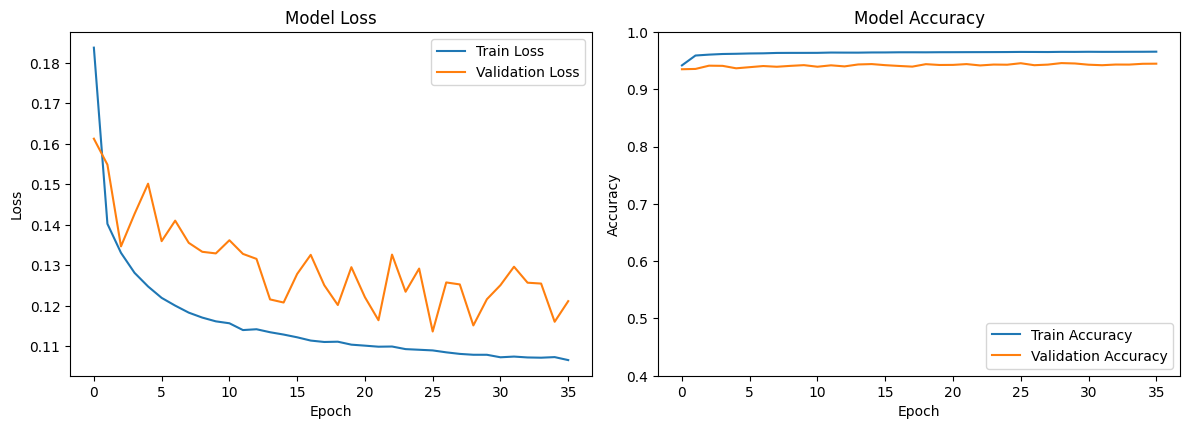

In [ ]:
import matplotlib.pyplot as plt

history = mlp_history.history

# Plot training & validation loss values
plt.figure(figsize=(12, 12))
plt.subplot(321)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(322)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.4, 1.0)  # Adjusted upper limit to 1.0 as accuracy should not exceed 1
plt.legend(loc='lower right')

plt.tight_layout()  # This can help prevent overlap of elements
plt.show()


In [ ]:
def segment_data_by_amount(X, y):
    low_amount_indices = X[:, df.columns.get_loc('Amount')] < 0  # Standardized amount < 0 (low)
    high_amount_indices = X[:, df.columns.get_loc('Amount')] >= 0  # Standardized amount >= 0 (high)

    X_low = X[low_amount_indices]
    y_low = y[low_amount_indices]
    X_high = X[high_amount_indices]
    y_high = y[high_amount_indices]

    return X_low, y_low, X_high, y_high

# Segment the test data
X_low_test, y_low_test, X_high_test, y_high_test = segment_data_by_amount(X_test, y_test)

# Encode features for each test segment
encoded_low_test = encoder_model.predict(X_low_test)
encoded_high_test = encoder_model.predict(X_high_test)


404/404 [==============================] - 1s 3ms/step


In [ ]:
# Ensure 'Time' is a column in the dataframe and sort by 'Time'
df_sorted = df.sort_values(by='Time').reset_index(drop=True)

# Calculate time differences between consecutive transactions
df_sorted['Time_Diff'] = df_sorted['Time'].diff().fillna(0)

# Exclude zero time differences for quantile calculation
non_zero_time_diff = df_sorted['Time_Diff'][df_sorted['Time_Diff'] > 0]

# Define thresholds for short and long time differences using adjusted percentiles
short_time_threshold = non_zero_time_diff.quantile(0.1)
long_time_threshold = non_zero_time_diff.quantile(0.9)

# Print the thresholds to check
print(f'Short time difference threshold (10th percentile): {short_time_threshold}')
print(f'Long time difference threshold (90th percentile): {long_time_threshold}')

# Segment data based on time differences
short_time_indices = df_sorted['Time_Diff'] <= short_time_threshold
long_time_indices = df_sorted['Time_Diff'] >= long_time_threshold

# Create segmented datasets
df_short_time = df_sorted[short_time_indices]
df_long_time = df_sorted[long_time_indices]

# Check the sizes of the segmented datasets
print(f'Size of short time segment: {df_short_time.shape[0]}')
print(f'Size of long time segment: {df_long_time.shape[0]}')

# Ensure the segments are not empty
if df_short_time.shape[0] == 0 or df_long_time.shape[0] == 0:
    raise ValueError("One of the segments is empty. Adjust the thresholds.")

# Extract features and labels for each segment
X_short_time = df_short_time.drop(['Class', 'Time_Diff'], axis=1).values
y_short_time = df_short_time['Class'].values

X_long_time = df_long_time.drop(['Class', 'Time_Diff'], axis=1).values
y_long_time = df_long_time['Class'].values

# Encode features for each time segment
encoded_short_time = encoder_model.predict(X_short_time)
encoded_long_time = encoder_model.predict(X_long_time)


Short time difference threshold (10th percentile): 2.1057923729639327e-05
Long time difference threshold (90th percentile): 4.211584745955621e-05
Size of short time segment: 177582
Size of long time segment: 13692
428/428 [==============================] - 1s 3ms/step


Evaluation on Low Amount Transactions:
1377/1377 [==============================] - 3s 2ms/step
Accuracy: 0.9540
Precision: 0.0270
Recall: 0.9180
F1 Score: 0.0524
ROC-AUC Score: 0.9531

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     43999
           1       0.03      0.92      0.05        61

    accuracy                           0.95     44060
   macro avg       0.51      0.94      0.51     44060
weighted avg       1.00      0.95      0.98     44060



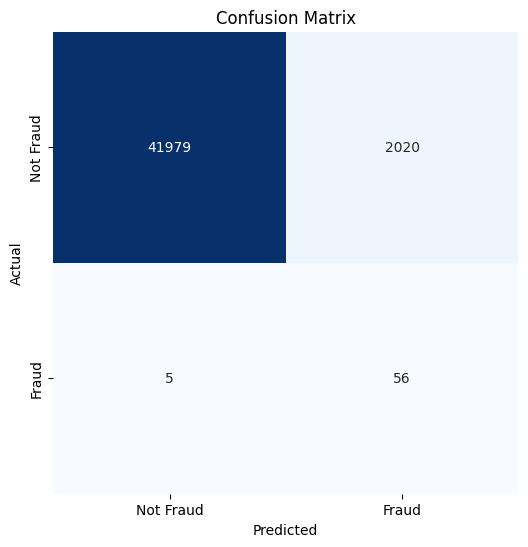

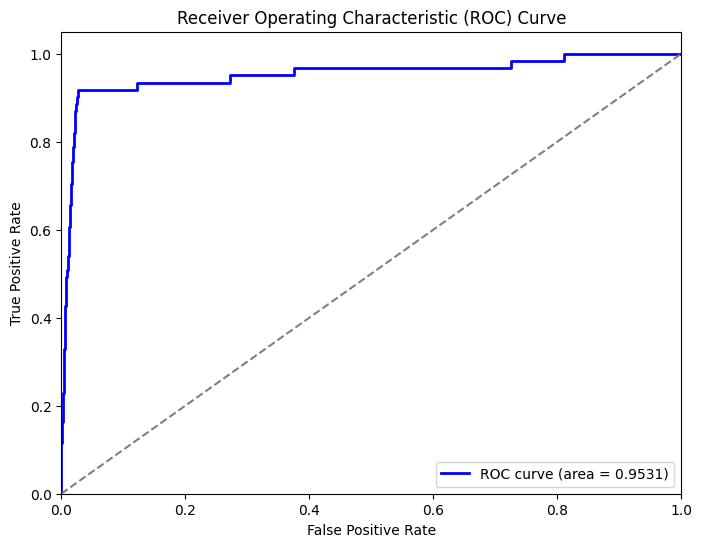

Evaluation on High Amount Transactions:
404/404 [==============================] - 1s 2ms/step
Accuracy: 0.9164
Precision: 0.0281
Recall: 0.8378
F1 Score: 0.0544
ROC-AUC Score: 0.9271

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     12865
           1       0.03      0.84      0.05        37

    accuracy                           0.92     12902
   macro avg       0.51      0.88      0.51     12902
weighted avg       1.00      0.92      0.95     12902



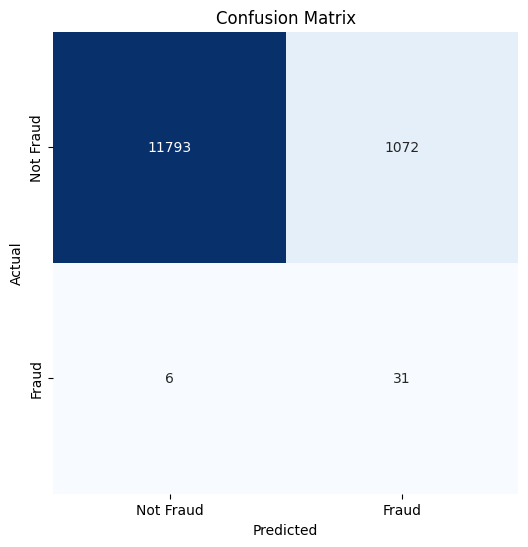

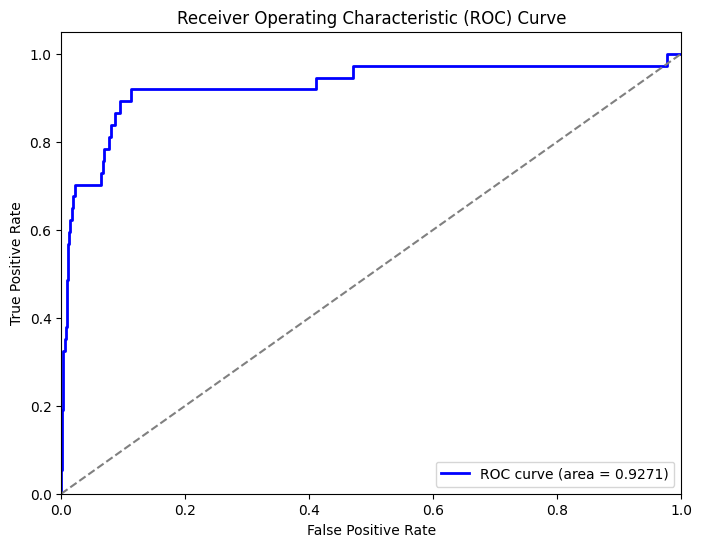

Evaluation on Short Time Difference Transactions:
5550/5550 [==============================] - 11s 2ms/step
Accuracy: 0.9486
Precision: 0.0266
Recall: 0.8925
F1 Score: 0.0517
ROC-AUC Score: 0.9499

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    177303
           1       0.03      0.89      0.05       279

    accuracy                           0.95    177582
   macro avg       0.51      0.92      0.51    177582
weighted avg       1.00      0.95      0.97    177582



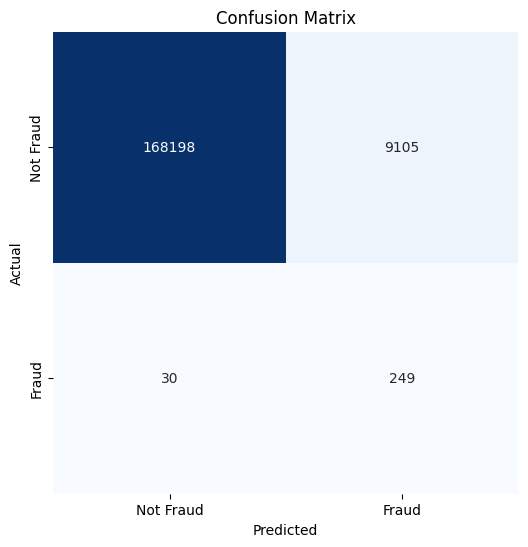

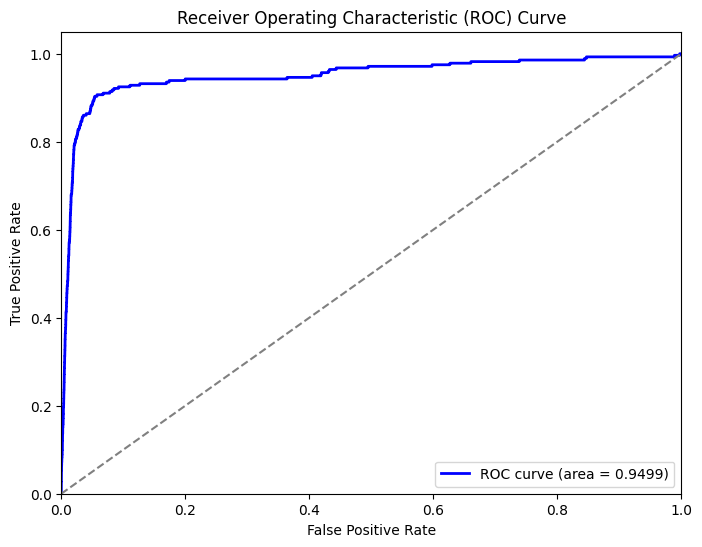

Evaluation on Long Time Difference Transactions:
428/428 [==============================] - 1s 2ms/step
Accuracy: 0.9379
Precision: 0.0643
Recall: 0.9062
F1 Score: 0.1201
ROC-AUC Score: 0.9390

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     13628
           1       0.06      0.91      0.12        64

    accuracy                           0.94     13692
   macro avg       0.53      0.92      0.54     13692
weighted avg       1.00      0.94      0.96     13692



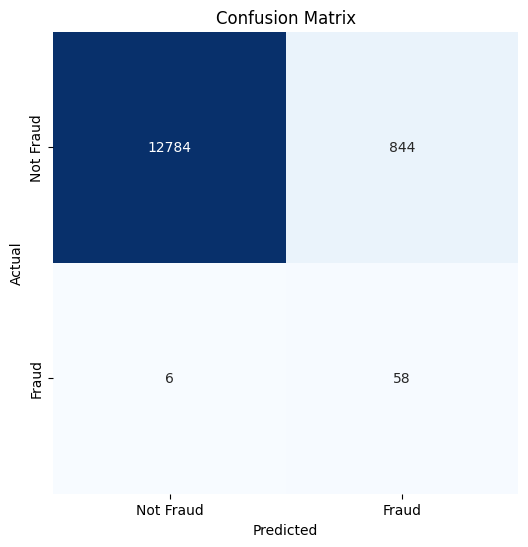

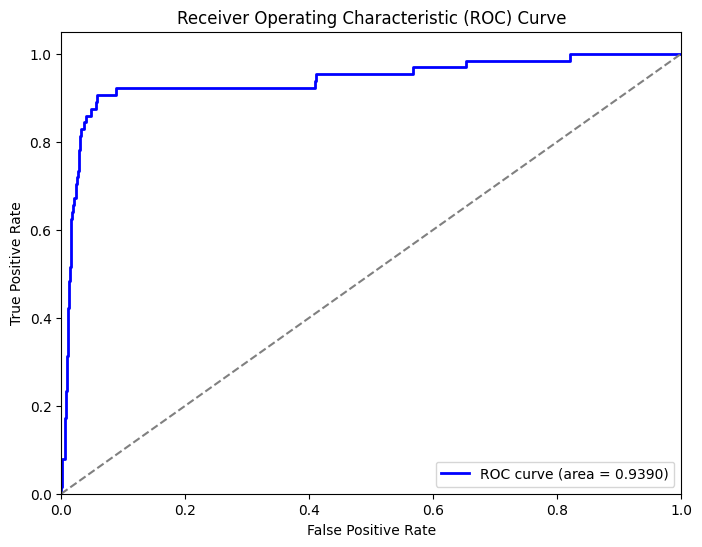

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(mlp, X_test_encoded, y_test):
    y_pred_proba = mlp.predict(X_test_encoded)
    y_pred = (y_pred_proba > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC-AUC Score: {roc_auc:.4f}')

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate on each amount segment
print("Evaluation on Low Amount Transactions:")
evaluate_model(mlp_classifier, encoded_low_test, y_low_test)

print("Evaluation on High Amount Transactions:")
evaluate_model(mlp_classifier, encoded_high_test, y_high_test)

# Evaluate on each time segment
print("Evaluation on Short Time Difference Transactions:")
evaluate_model(mlp_classifier, encoded_short_time, y_short_time)

print("Evaluation on Long Time Difference Transactions:")
evaluate_model(mlp_classifier, encoded_long_time, y_long_time)


404/404 [==============================] - 1s 2ms/step


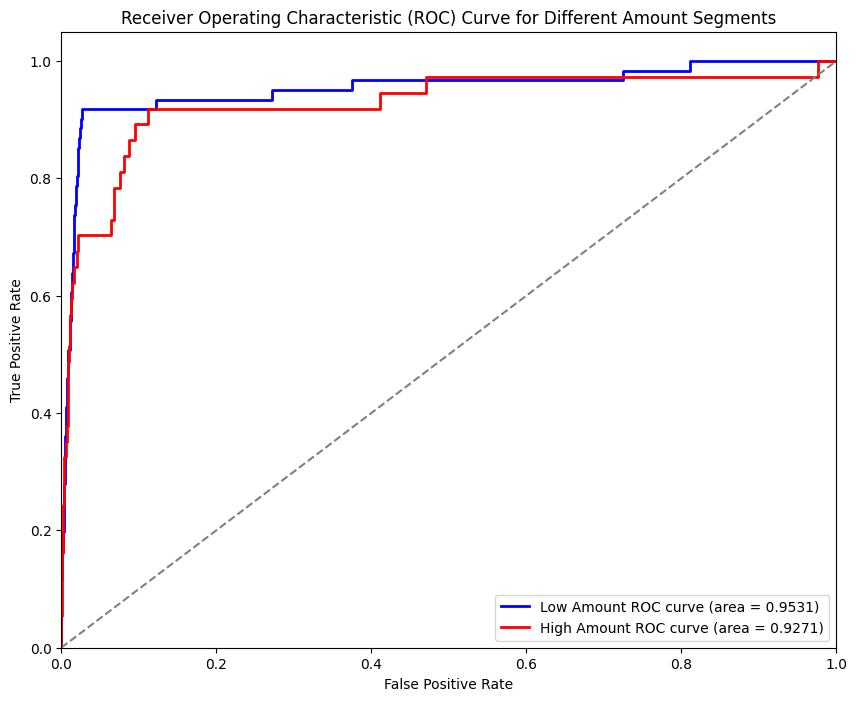

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_combined_roc_curves(mlp, X_low_test, y_low_test, X_high_test, y_high_test):
    # Predict probabilities for low and high amount transactions
    y_low_pred_proba = mlp.predict(X_low_test)
    y_high_pred_proba = mlp.predict(X_high_test)

    # Compute ROC curve and ROC area for low amount transactions
    fpr_low, tpr_low, _ = roc_curve(y_low_test, y_low_pred_proba)
    roc_auc_low = auc(fpr_low, tpr_low)

    # Compute ROC curve and ROC area for high amount transactions
    fpr_high, tpr_high, _ = roc_curve(y_high_test, y_high_pred_proba)
    roc_auc_high = auc(fpr_high, tpr_high)

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    plt.plot(fpr_low, tpr_low, color='blue', lw=2, label='Low Amount ROC curve (area = %0.4f)' % roc_auc_low)
    plt.plot(fpr_high, tpr_high, color='red', lw=2, label='High Amount ROC curve (area = %0.4f)' % roc_auc_high)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Different Amount Segments')
    plt.legend(loc="lower right")
    plt.show()

# Plot combined ROC curves for low and high amount transactions
plot_combined_roc_curves(mlp_classifier, encoded_low_test, y_low_test, encoded_high_test, y_high_test)


428/428 [==============================] - 1s 2ms/step


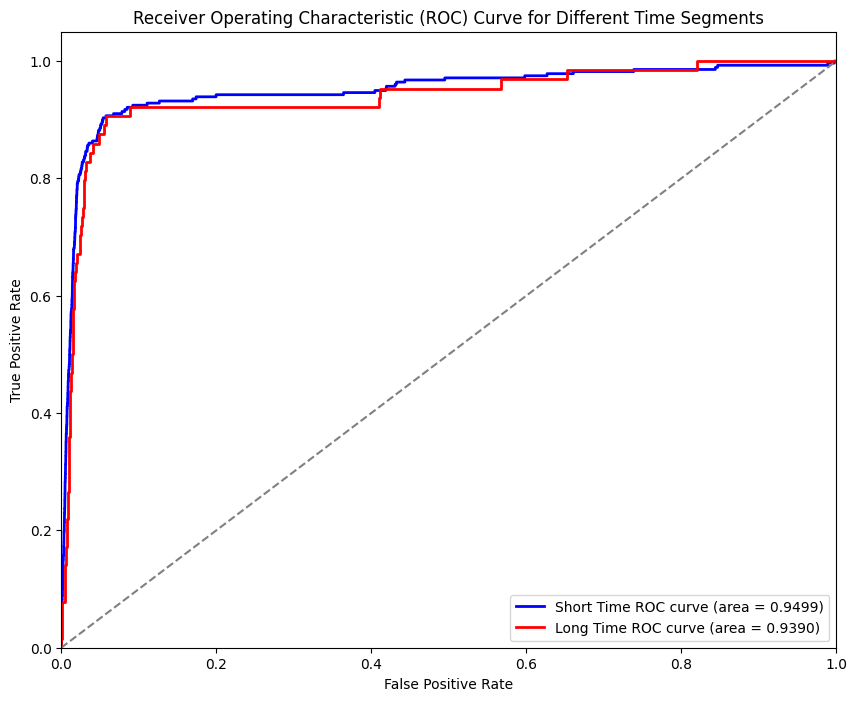

In [ ]:
def plot_combined_roc_curves_time(mlp, X_short_time, y_short_time, X_long_time, y_long_time):
    # Predict probabilities for short and long time difference transactions
    y_short_pred_proba = mlp.predict(X_short_time)
    y_long_pred_proba = mlp.predict(X_long_time)

    # Compute ROC curve and ROC area for short time difference transactions
    fpr_short, tpr_short, _ = roc_curve(y_short_time, y_short_pred_proba)
    roc_auc_short = auc(fpr_short, tpr_short)

    # Compute ROC curve and ROC area for long time difference transactions
    fpr_long, tpr_long, _ = roc_curve(y_long_time, y_long_pred_proba)
    roc_auc_long = auc(fpr_long, tpr_long)

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    plt.plot(fpr_short, tpr_short, color='blue', lw=2, label='Short Time ROC curve (area = %0.4f)' % roc_auc_short)
    plt.plot(fpr_long, tpr_long, color='red', lw=2, label='Long Time ROC curve (area = %0.4f)' % roc_auc_long)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Different Time Segments')
    plt.legend(loc="lower right")
    plt.show()

# Plot combined ROC curves for short and long time difference transactions
plot_combined_roc_curves_time(mlp_classifier, encoded_short_time, y_short_time, encoded_long_time, y_long_time)
